# Hugging Face Papers retrieval

This notebook shows how one can use LaVague to create an agent that can outperform Gemini or ChatGPT on the task of finding the latest hottest papers on [Hugging Face Papers](https://huggingface.co/papers)!




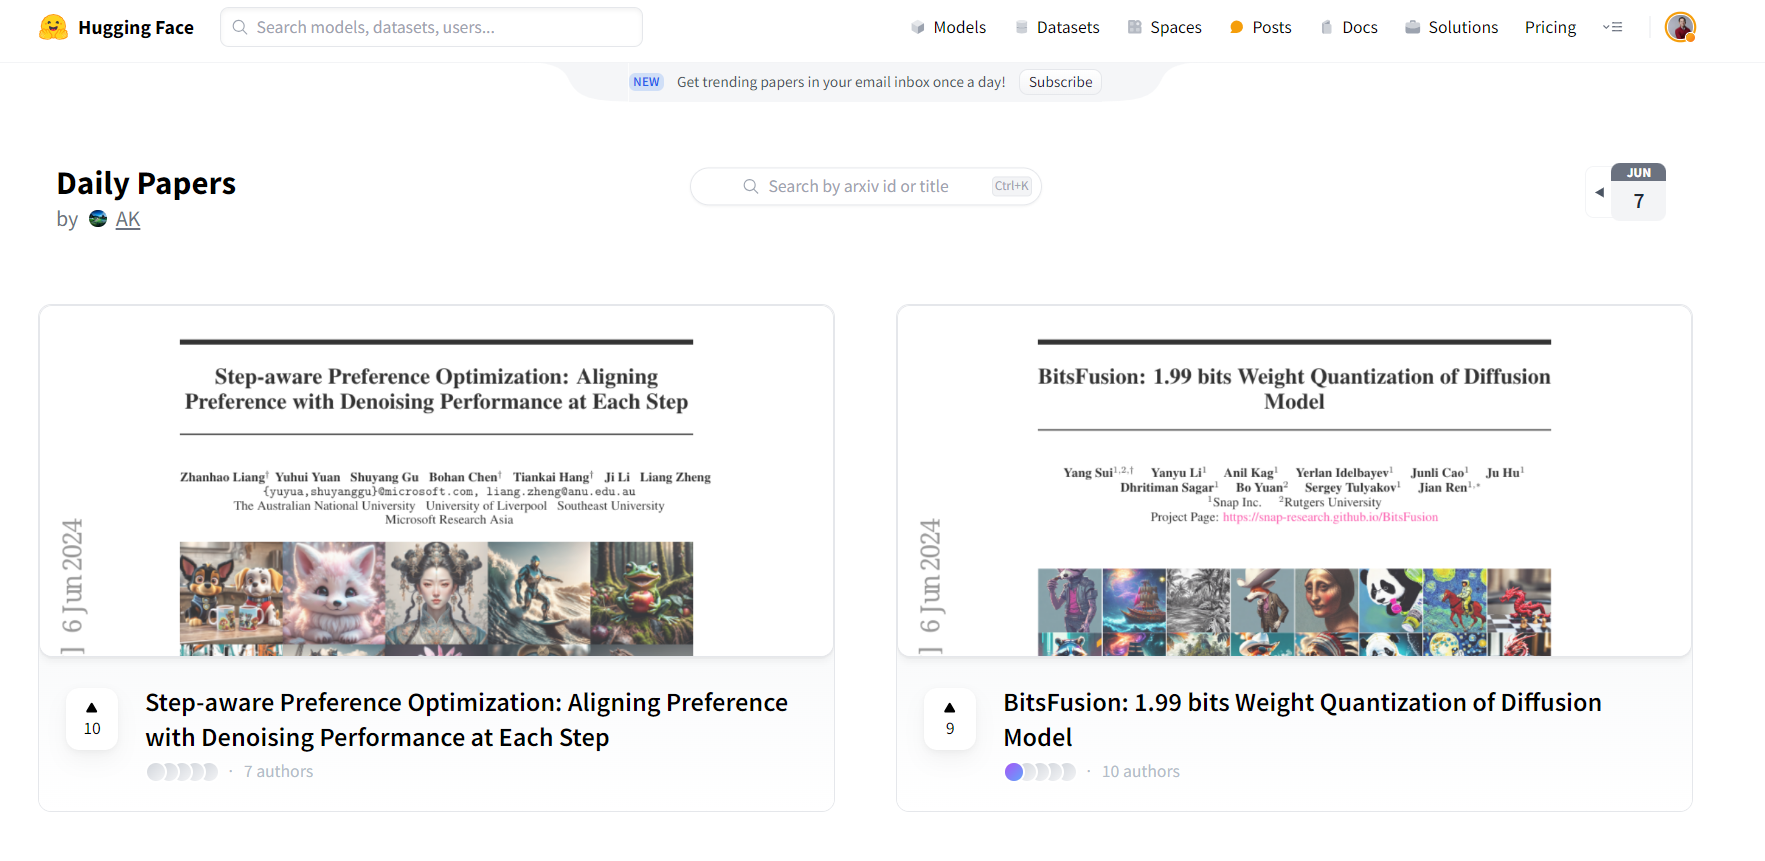

We will create the agent and serve it through a [Gradio](https://huggingface.co/papers) interface.

You can see in the demo below how our agent is able to outperform both Gemini and ChatGPT to answer the query `"What is the most trendy recent paper on text-to-video on Hugging Face papers? Provide the date and a summary of the paper"`.

<figure class="video_container">
  <video controls="true" allowfullscreen="true">
    <source src="https://github.com/lavague-ai/LaVague/blob/add-example/docs/assets/hf_demo_papers.mp4?raw=true" type="video/mp4">
  </video>
</figure>

# Pre-requisites

**Note**: We use OpenAI's models, for the embedding, LLM and Vision model. You will need to set the `OPENAI_API_KEY` variable in your local environment with a valid API key for this example to work.

If you don't have an OpenAI API key, please get one here: https://platform.openai.com/docs/quickstart/developer-quickstart

# Installation

We start by downloading LaVague.

In [1]:
!pip install lavague

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 112.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.9 MB/s eta 0:

We will need to set our OpenAI Key as a Colab secret (see the key icon on the left-hand side of the Colab notebook) named `OPENAI_API_KEY` and then convert it to an environment variable with the same name.

In [1]:
import os

# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
else:
    os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

# Demo

We start here by pulling extra knowledge about Hugging Face's Papers pages to ensure the `WorldModel` will provide the right reasoning steps.

You can learn more about building Agents with LaVague in our [webinar](https://www.youtube.com/watch?v=bNE4s8h3CIc).

In [2]:
!wget https://raw.githubusercontent.com/lavague-ai/LaVague/main/examples/knowledge/hf_knowledge.txt

--2024-06-10 13:58:02--  https://raw.githubusercontent.com/lavague-ai/LaVague/main/examples/knowledge/hf_knowledge.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3968 (3.9K) [text/plain]
Saving to: ‘hf_knowledge.txt.1’

hf_knowledge.txt.1  100%[===================>]   3.88K  --.-KB/s    in 0s      

2024-06-10 13:58:02 (41.6 MB/s) - ‘hf_knowledge.txt.1’ saved [3968/3968]



We can now define our agent and run it to create a Gradio demo.

In [ ]:
from lavague.drivers.selenium import SeleniumDriver
from lavague.core import ActionEngine, WorldModel
from lavague.core.agents import WebAgent

selenium_driver = SeleniumDriver()
action_engine = ActionEngine(selenium_driver)
world_model = WorldModel()
world_model.add_knowledge("hf_knowledge.txt")

agent = WebAgent(world_model, action_engine)
agent.get("https://huggingface.co/papers")
agent.demo("What is the most trendy recent paper on text to video on Hugging Face papers? Provide the date and a summary of the paper")

2024-06-10 13:59:51,356 - INFO - Screenshot folder cleared


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
IMPORTANT: You are using gradio version 4.26.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://776719fb5f91f2162a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


2024-06-10 14:00:04,798 - INFO - Screenshot folder cleared
2024-06-10 14:00:10,889 - INFO - Thoughts:
- The current screenshot shows the "Daily Papers" section on Hugging Face.
- The objective is to find the most trendy recent paper on text to video.
- The current screenshot does not show any paper related to text to video.
- To ensure we have complete information, we need to scan the entire page as the current screenshot seems to show only part of the content.

Next engine: Navigation Controls
Instruction: SCAN
2024-06-10 14:00:20,292 - INFO - Thoughts:
- The current screenshots show the daily papers on Hugging Face.
- The objective is to find the most trendy recent paper on text to video.
- The current screenshots do not show any paper related to text to video.
- To find the relevant paper, we need to navigate to older papers.
- The 'Previous' button allows navigating to pages containing older papers.
- Therefore, the best next step is to click on the 'Previous' button to find papers